In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import datetime as dt
import seaborn as sns

import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
from panel.interact import interact
from datetime import datetime
from pandas import DataFrame

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Pranav\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


C:\Users\Pranav\anaconda3\envs\pyvizenv\lib\site-packages\xarray\core\merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


### links for the 5 years of historical data (June 25 2017 to June 25 2021) were found from the following URLs:

https://www.nasdaq.com/market-activity/commodities/zc/historical

https://www.nasdaq.com/market-activity/commodities/lbs/historical

https://www.nasdaq.com/market-activity/commodities/zs/historical   

In [2]:
# Read csv historical data for Corn (ZC)
csvpath_corn=("Source Data/HistoricalData_corn(nasdaq).csv")
corn1_df = pd.read_csv(csvpath_corn, parse_dates=True, index_col="Date", infer_datetime_format=True)

#Display sample data
corn1_df.head()

Close/Last  Volume    Open    High     Low
Date                                                  
2021-06-28      675.25   64989  637.75  676.50  636.75
2021-06-25      636.50   92335  653.25  659.50  634.00
2021-06-24      653.25  118774  664.00  664.00  650.75
2021-06-23      664.25   92037  660.50  666.25  659.25
2021-06-22      659.75  109273  662.75  668.00  653.75

In [3]:
# Read csv historical data for Lumber (LBS)
csvpath_lumber=("Source Data/HistoricalData_lumber(nasdaq).csv")
lumber1_df = pd.read_csv(csvpath_lumber, parse_dates=True, index_col="Date", infer_datetime_format=True)

#Display sample data
lumber1_df.head()

Close/Last  Volume   Open   High    Low
Date                                               
2021-06-28       797.3   483.0  774.0  805.0  721.9
2021-06-25       774.0   318.0  834.5  834.5  774.0
2021-06-24       837.0   280.0  883.7  917.2  837.0
2021-06-23       879.0   190.0  866.8  900.5  859.8
2021-06-22       866.4   344.0  896.9  920.5  860.0

In [4]:
# Read csv historical data for Soya bean (ZS)
csvpath_palmoil=("Source Data/HistoricalData_soyabean.csv")
soyabean1_df = pd.read_csv(csvpath_palmoil, parse_dates=True, index_col="Date", infer_datetime_format=True)

#Display sample data
soyabean1_df.head()

Close/Last    Volume     Open     High      Low
Date                                                       
2021-06-29     1310.25   79395.0  1325.25  1327.00  1298.00
2021-06-28     1312.50   94655.0  1269.75  1319.00  1267.00
2021-06-25     1269.75  108519.0  1290.75  1304.50  1259.75
2021-06-24     1291.75  103723.0  1298.75  1299.75  1261.75
2021-06-23     1300.25   78840.0  1300.25  1311.75  1293.75

In [5]:
print ("Corn (ZC) commodity has {} observations & {} features".format(*corn1_df.shape))
print ("Lumber (LBS) commodity has {} observations & {} features".format(*lumber1_df.shape))
print ("Soya bean (ZS) commodity has {} observations & {} features".format(*soyabean1_df.shape))


Corn (ZC) commodity has 1258 observations & 5 features
Lumber (LBS) commodity has 1258 observations & 5 features
Soya bean (ZS) commodity has 1259 observations & 5 features


In [6]:
corn1_df.isnull().sum()

Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [7]:
lumber1_df.isnull().sum()

Close/Last     0
Volume        22
Open           0
High           0
Low            0
dtype: int64

In [8]:
soyabean1_df.isnull().sum()

Close/Last    0
Volume        2
Open          0
High          0
Low           0
dtype: int64

In [9]:
corn1_df.describe()

Close/Last         Volume         Open         High          Low
count  1258.000000    1258.000000  1258.000000  1258.000000  1258.000000
mean    388.065580  125021.364070   387.892886   391.743839   384.385135
std      77.829565   85467.437117    77.543080    79.236690    75.973554
min     301.500000      28.000000   302.000000   307.250000   300.250000
25%     349.500000   74206.500000   349.250000   352.000000   346.500000
50%     366.750000  126116.500000   366.875000   370.000000   364.375000
75%     387.000000  175820.750000   386.750000   389.500000   384.187500
max     772.750000  482695.000000   766.750000   775.000000   756.750000

In [10]:
lumber1_df.describe()

Close/Last       Volume         Open         High          Low
count  1258.000000  1236.000000  1258.000000  1258.000000  1258.000000
mean    476.787838   428.346278   476.730207   483.824245   469.940700
std     223.607012   213.100751   223.884069   228.483282   219.019631
min     259.800000     2.000000   260.400000   265.600000   251.500000
25%     348.525000   269.750000   349.825000   354.625000   343.725000
50%     391.250000   396.500000   391.150000   396.650000   386.600000
75%     512.400000   537.250000   510.875000   517.875000   505.750000
max    1670.500000  1677.000000  1710.500000  1733.500000  1618.700000

In [11]:
soyabean1_df.describe()

Close/Last         Volume         Open         High          Low
count  1259.000000    1257.000000  1259.000000  1259.000000  1259.000000
mean    996.412828  105646.690533   996.427720  1004.874305   988.796068
std     162.190286   35021.451268   162.057537   164.389817   159.851299
min     802.500000    5386.000000   805.000000   807.000000   791.000000
25%     895.000000   81342.000000   895.500000   900.000000   888.375000
50%     954.250000   98871.000000   953.750000   961.250000   946.500000
75%    1024.250000  121942.000000  1024.125000  1034.750000  1015.250000
max    1642.500000  327585.000000  1621.000000  1667.500000  1615.250000

In [12]:
corn1_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2021-06-28 to 2016-06-29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  1258 non-null   float64
 1   Volume      1258 non-null   int64  
 2   Open        1258 non-null   float64
 3   High        1258 non-null   float64
 4   Low         1258 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [13]:
lumber1_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2021-06-28 to 2016-06-29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  1258 non-null   float64
 1   Volume      1236 non-null   float64
 2   Open        1258 non-null   float64
 3   High        1258 non-null   float64
 4   Low         1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


In [14]:
soyabean1_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2021-06-29 to 2016-06-29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  1259 non-null   float64
 1   Volume      1257 non-null   float64
 2   Open        1259 non-null   float64
 3   High        1259 non-null   float64
 4   Low         1259 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


In [15]:
# Initilize datafrme for data slicing
corn_df = []
lumber_df =[]
soyabean_df =[]

# Slicing data into the new dataframe
corn_df = corn1_df[['Close/Last', 'Volume']]
lumber_df = lumber1_df[['Close/Last', 'Volume']]
soyabean_df = soyabean1_df[['Close/Last', 'Volume']]

# Display sample
soyabean_df.tail(5)

Close/Last    Volume
Date                            
2016-07-06     1073.25  166641.0
2016-07-05     1077.25  153685.0
2016-07-01     1137.50  103691.0
2016-06-30     1153.25  219688.0
2016-06-29     1112.50   98054.0

In [16]:
# Join the Corn database, Lumber database and Soya base database into a single datafram using 'concat' 
agriculture_df = pd.concat([corn_df, lumber_df, soyabean_df], axis=1, sort=True) 

#display sample data
agriculture_df

Close/Last    Volume  Close/Last  Volume  Close/Last    Volume
Date                                                                      
2016-06-29      372.75   87901.0       307.7   217.0     1112.50   98054.0
2016-06-30      358.75   35074.0       307.7   265.0     1153.25  219688.0
2016-07-01      353.00    6565.0       315.0   393.0     1137.50  103691.0
2016-07-05      344.00    4662.0       322.8   905.0     1077.25  153685.0
2016-07-06      335.75    4133.0       321.6   463.0     1073.25  166641.0
...                ...       ...         ...     ...         ...       ...
2021-06-23      664.25   92037.0       879.0   190.0     1300.25   78840.0
2021-06-24      653.25  118774.0       837.0   280.0     1291.75  103723.0
2021-06-25      636.50   92335.0       774.0   318.0     1269.75  108519.0
2021-06-28      675.25   64989.0       797.3   483.0     1312.50   94655.0
2021-06-29         NaN       NaN         NaN     NaN     1310.25   79395.0

[1259 rows x 6 columns]

In [17]:
# Assigning approprate new column names 
columns = ('Corn (ZC)', 'Corn_Vol', 'Lumber (LBS)', 'Lumber_Vol','Soya_bean (ZS)','Soya_bean_Vol')
agriculture_df.columns = columns

# Sorting the new database in Index column (Date)
agriculture_df.sort_index(inplace=True)

agriculture_df.head()

Corn (ZC)  Corn_Vol  Lumber (LBS)  Lumber_Vol  Soya_bean (ZS)  \
Date                                                                        
2016-06-29     372.75   87901.0         307.7       217.0         1112.50   
2016-06-30     358.75   35074.0         307.7       265.0         1153.25   
2016-07-01     353.00    6565.0         315.0       393.0         1137.50   
2016-07-05     344.00    4662.0         322.8       905.0         1077.25   
2016-07-06     335.75    4133.0         321.6       463.0         1073.25   

            Soya_bean_Vol  
Date                       
2016-06-29        98054.0  
2016-06-30       219688.0  
2016-07-01       103691.0  
2016-07-05       153685.0  
2016-07-06       166641.0

In [18]:
agri_price_df = agriculture_df[['Corn (ZC)', 'Lumber (LBS)', 'Soya_bean (ZS)']]
agri_price_df

Corn (ZC)  Lumber (LBS)  Soya_bean (ZS)
Date                                               
2016-06-29     372.75         307.7         1112.50
2016-06-30     358.75         307.7         1153.25
2016-07-01     353.00         315.0         1137.50
2016-07-05     344.00         322.8         1077.25
2016-07-06     335.75         321.6         1073.25
...               ...           ...             ...
2021-06-23     664.25         879.0         1300.25
2021-06-24     653.25         837.0         1291.75
2021-06-25     636.50         774.0         1269.75
2021-06-28     675.25         797.3         1312.50
2021-06-29        NaN           NaN         1310.25

[1259 rows x 3 columns]

In [19]:
agri_price_df.sort_index(inplace=True)

In [20]:
agri_vol_df = agriculture_df[['Corn_Vol','Lumber_Vol','Soya_bean_Vol']]

In [21]:
agri_vol_df

Corn_Vol  Lumber_Vol  Soya_bean_Vol
Date                                           
2016-06-29   87901.0       217.0        98054.0
2016-06-30   35074.0       265.0       219688.0
2016-07-01    6565.0       393.0       103691.0
2016-07-05    4662.0       905.0       153685.0
2016-07-06    4133.0       463.0       166641.0
...              ...         ...            ...
2021-06-23   92037.0       190.0        78840.0
2021-06-24  118774.0       280.0       103723.0
2021-06-25   92335.0       318.0       108519.0
2021-06-28   64989.0       483.0        94655.0
2021-06-29       NaN         NaN        79395.0

[1259 rows x 3 columns]

In [22]:
# Corn price is 
# Lumber price is per thousand board feet
# Soya bean price is 

In [23]:
# Plotting the "Price of the selected commodities"
fig_agri_price = agri_price_df.hvplot(title='Price of Agricultural commodities (Corn, Lumber, Soya bean)', 
                   rot=90,
                   width = 750,
                    height = 400,
                   figsize=(15,10)
                  )

fig_agri_price  

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

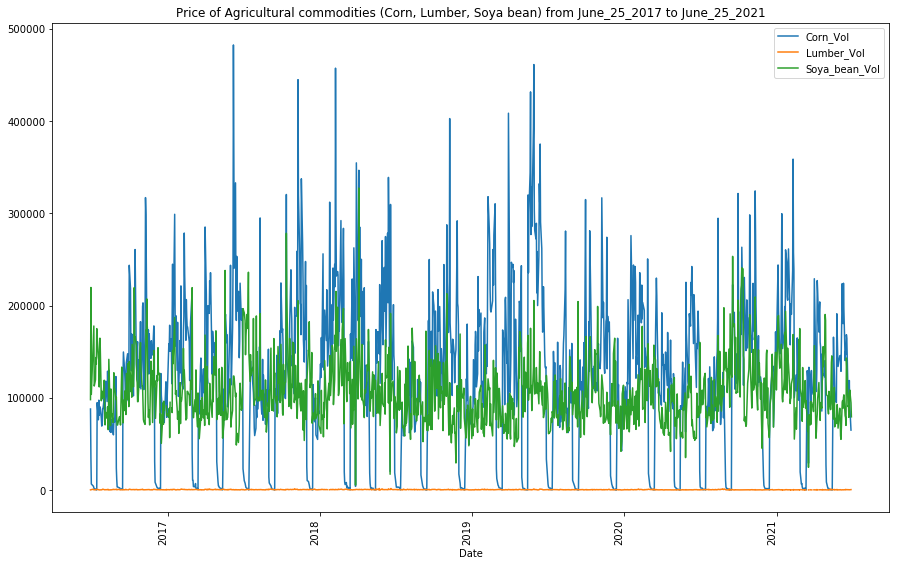

In [24]:
# Plotting the "Volume of the selected commodities"
agri_vol_df.plot(title='Price of Agricultural commodities (Corn, Lumber, Soya bean) from June_25_2017 to June_25_2021', 
                   rot=90,
                   figsize=(15,10)
                  )

In [25]:
# Data verification from main database  
agriculture_df.head()

Corn (ZC)  Corn_Vol  Lumber (LBS)  Lumber_Vol  Soya_bean (ZS)  \
Date                                                                        
2016-06-29     372.75   87901.0         307.7       217.0         1112.50   
2016-06-30     358.75   35074.0         307.7       265.0         1153.25   
2016-07-01     353.00    6565.0         315.0       393.0         1137.50   
2016-07-05     344.00    4662.0         322.8       905.0         1077.25   
2016-07-06     335.75    4133.0         321.6       463.0         1073.25   

            Soya_bean_Vol  
Date                       
2016-06-29        98054.0  
2016-06-30       219688.0  
2016-07-01       103691.0  
2016-07-05       153685.0  
2016-07-06       166641.0

Text(0, 0.5, 'Corn Volume')

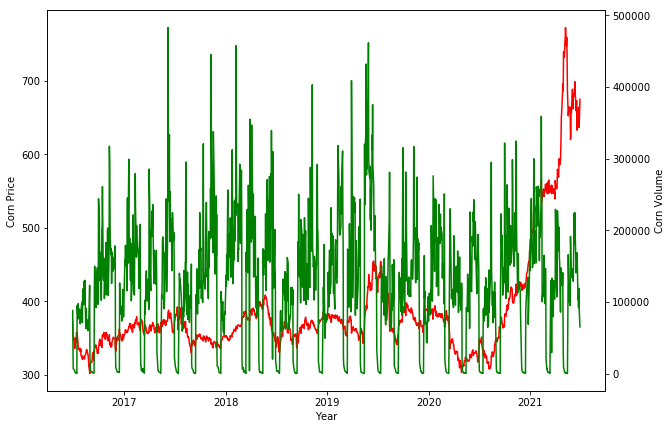

In [26]:
# Plotting Corn price and volume on two indices
fig_corn,ax = plt.subplots(figsize=(10,7))
ax.plot(agriculture_df.index, agriculture_df['Corn (ZC)'], color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Corn Price")
ax2 = ax.twinx()
ax2.plot(agriculture_df.index, agriculture_df['Corn_Vol'],color="green")
ax2.set_ylabel("Corn Volume")


Text(0, 0.5, 'Lumber Volume')

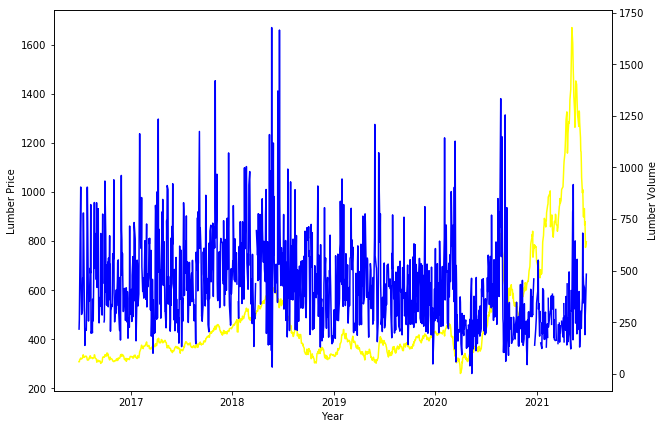

In [27]:
# Plotting Lumber price and volume on two indices
fig_lumber,ax = plt.subplots(figsize=(10,7))
ax.plot(agriculture_df.index, agriculture_df['Lumber (LBS)'], color="yellow")
ax.set_xlabel("Year")
ax.set_ylabel("Lumber Price")
ax2 = ax.twinx()
ax2.plot(agriculture_df.index, agriculture_df['Lumber_Vol'],color="blue")
ax2.set_ylabel("Lumber Volume")


Text(0, 0.5, 'Soya_bean Volume')

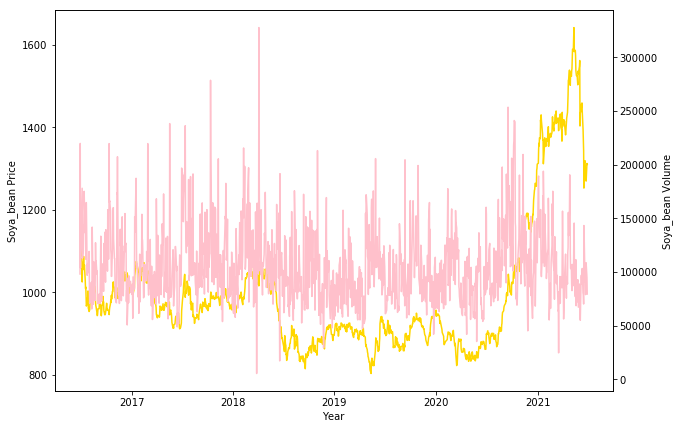

In [28]:
# Plotting Soya_bean price and volume on two indices
fig_soya,ax = plt.subplots(figsize=(10,7))
ax.plot(agriculture_df.index, agriculture_df['Soya_bean (ZS)'], color="gold")
ax.set_xlabel("Year")
ax.set_ylabel("Soya_bean Price")
ax2 = ax.twinx()
ax2.plot(agriculture_df.index, agriculture_df['Soya_bean_Vol'],color="pink")
ax2.set_ylabel("Soya_bean Volume")


Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Matplotlib(Figure)
    [3] Matplotlib(Figure)
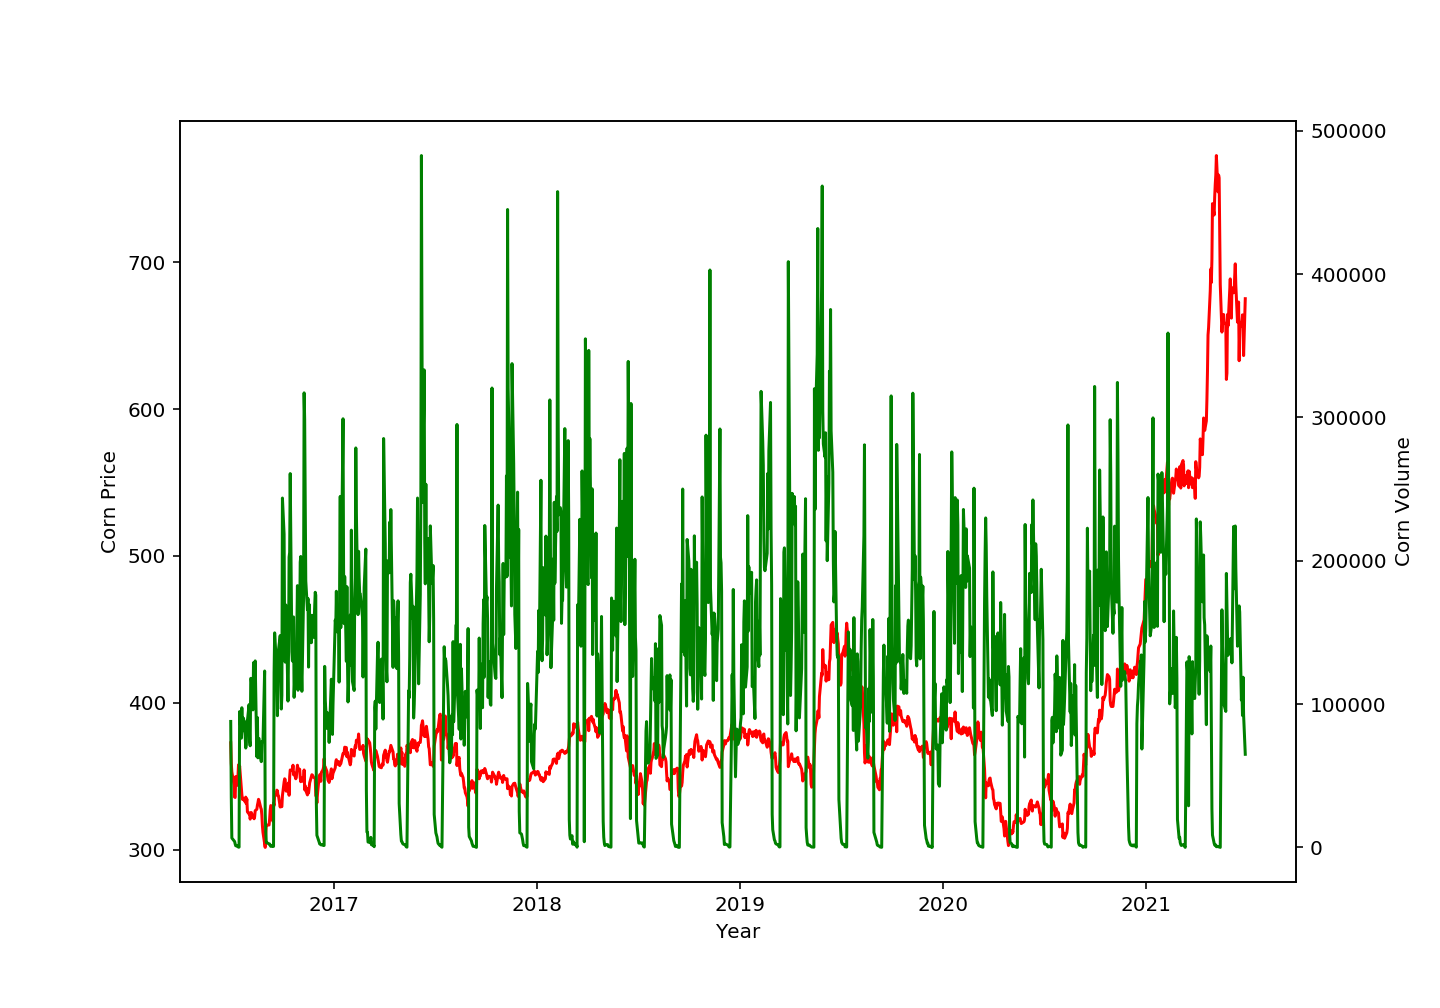
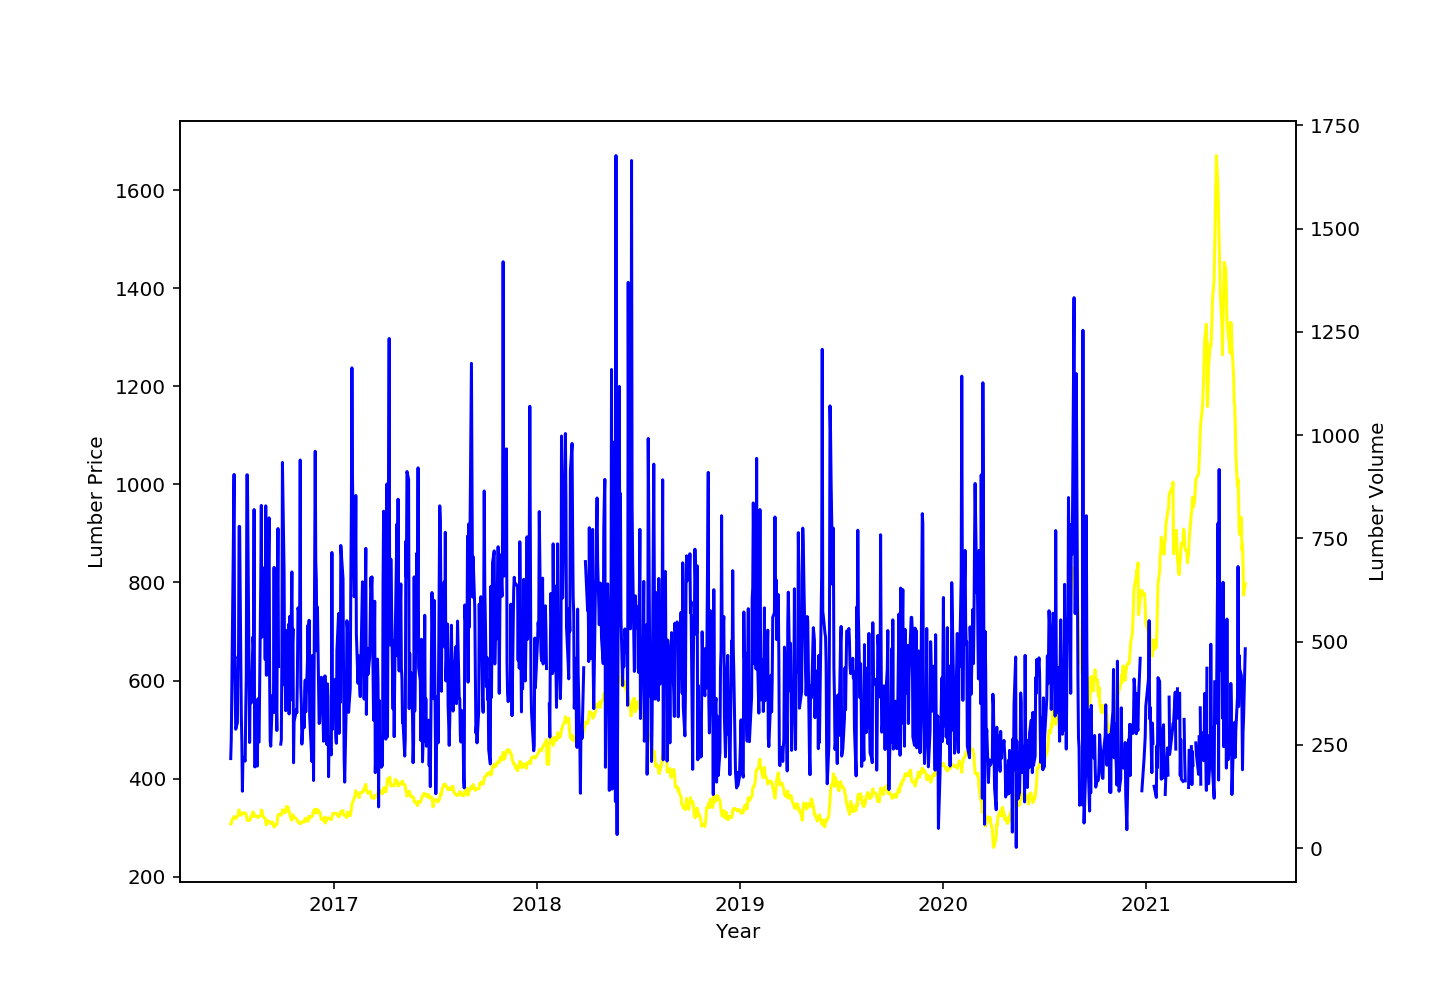

In [29]:
# Plotting corn and lumner in column (for tabs and panel)
price_vol_as_column1 = pn.Column(
    '# Price / Volume  ',
    '## Data on price and volume of Corn and lumber',
    fig_corn, fig_lumber
    )
price_vol_as_column1

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Matplotlib(Figure)
    [3] HoloViews(NdOverlay)
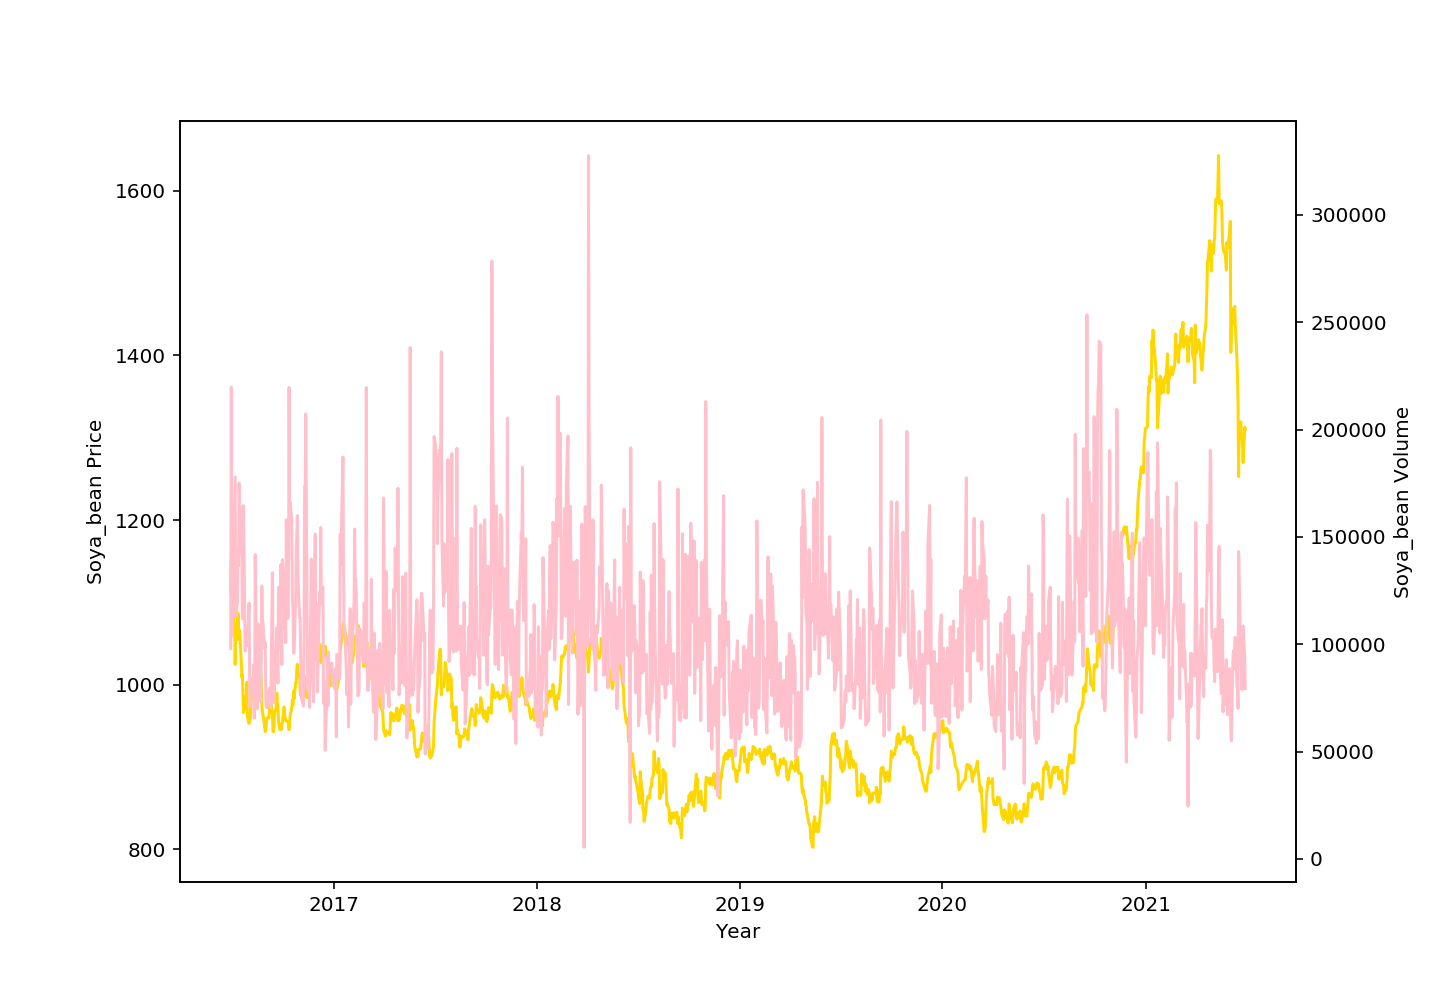

In [30]:
# Plotting soya and price of commodities in column (for tabs and panel)
price_vol_as_column2 = pn.Column(
    '# Price / Volume ',
    '## Data on price and volume of Soya and price trend of all three commodities ',
    fig_soya, fig_agri_price
    )
price_vol_as_column2

Row
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Matplotlib(Figure)
        [3] Matplotlib(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Matplotlib(Figure)
        [3] HoloViews(NdOverlay)
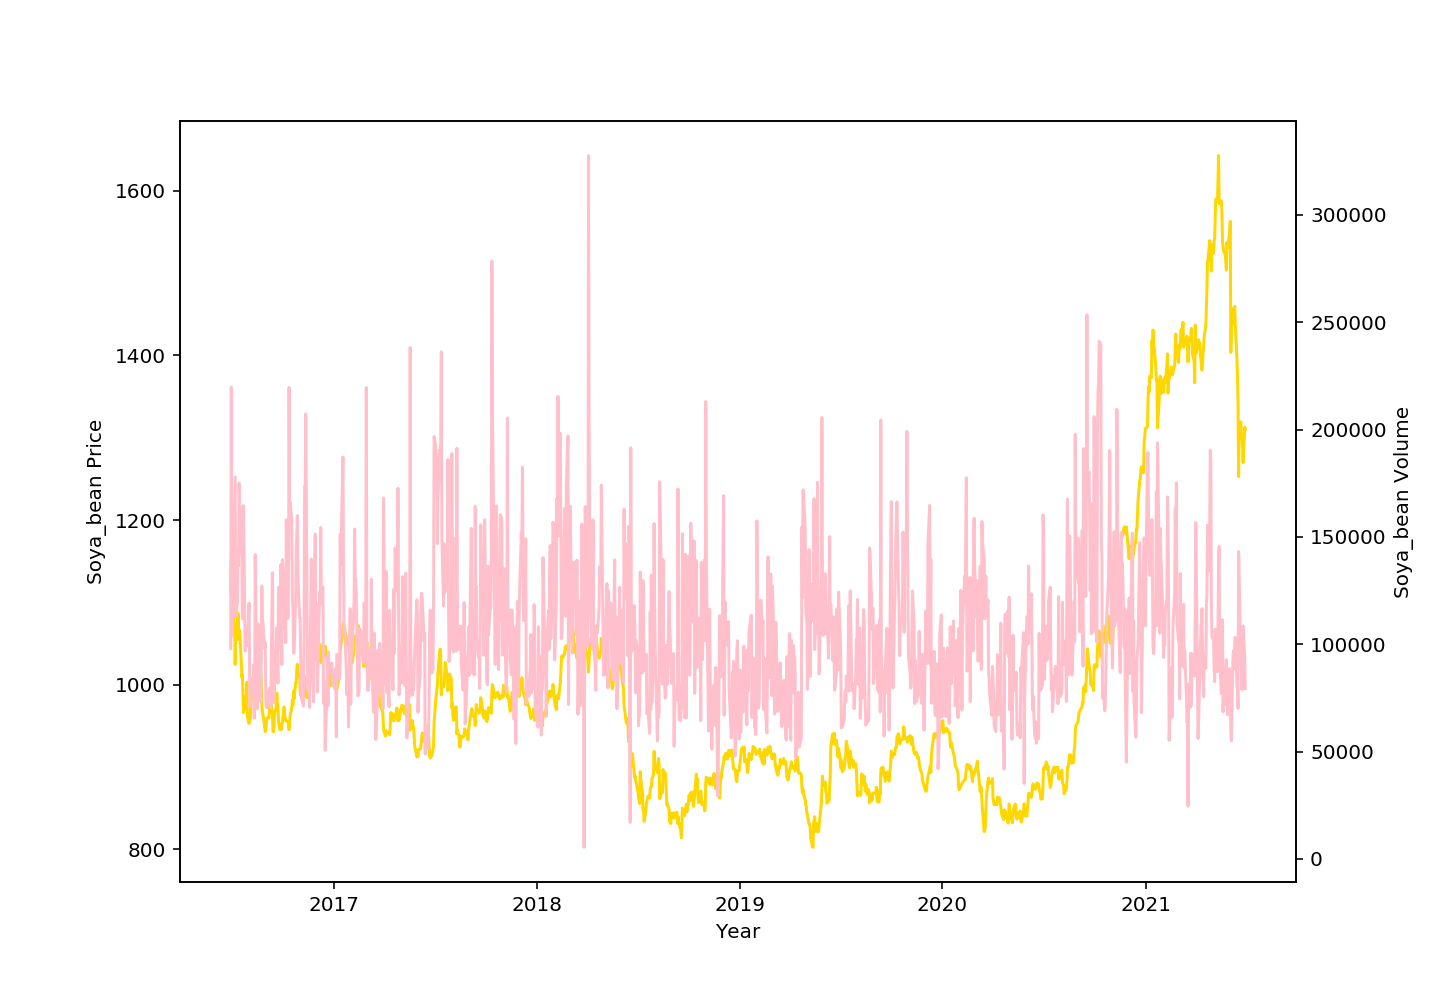
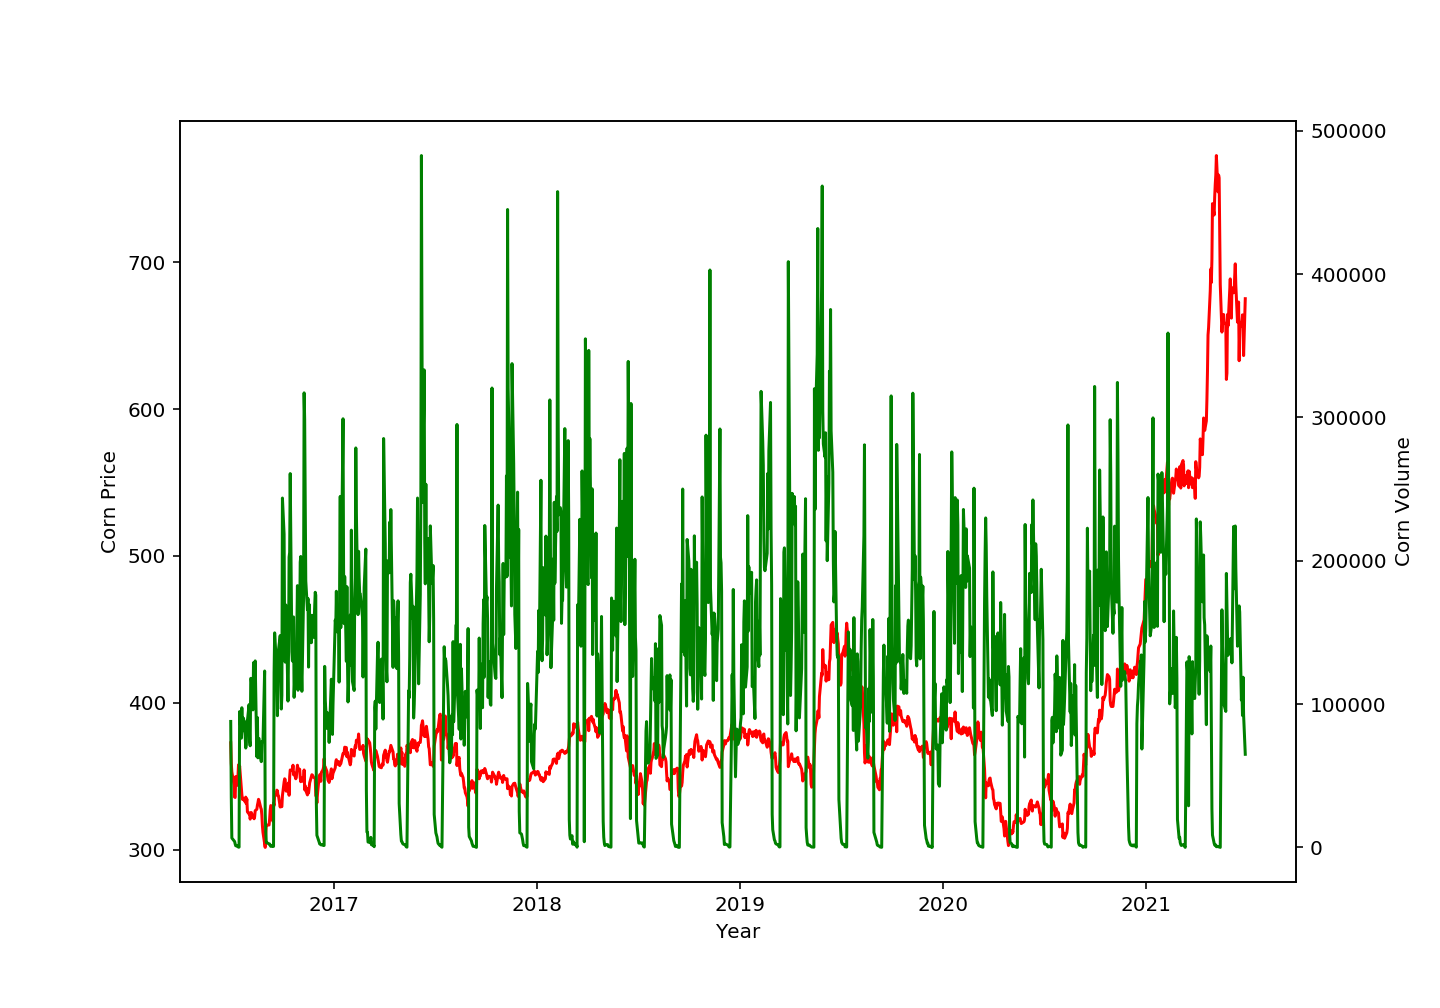
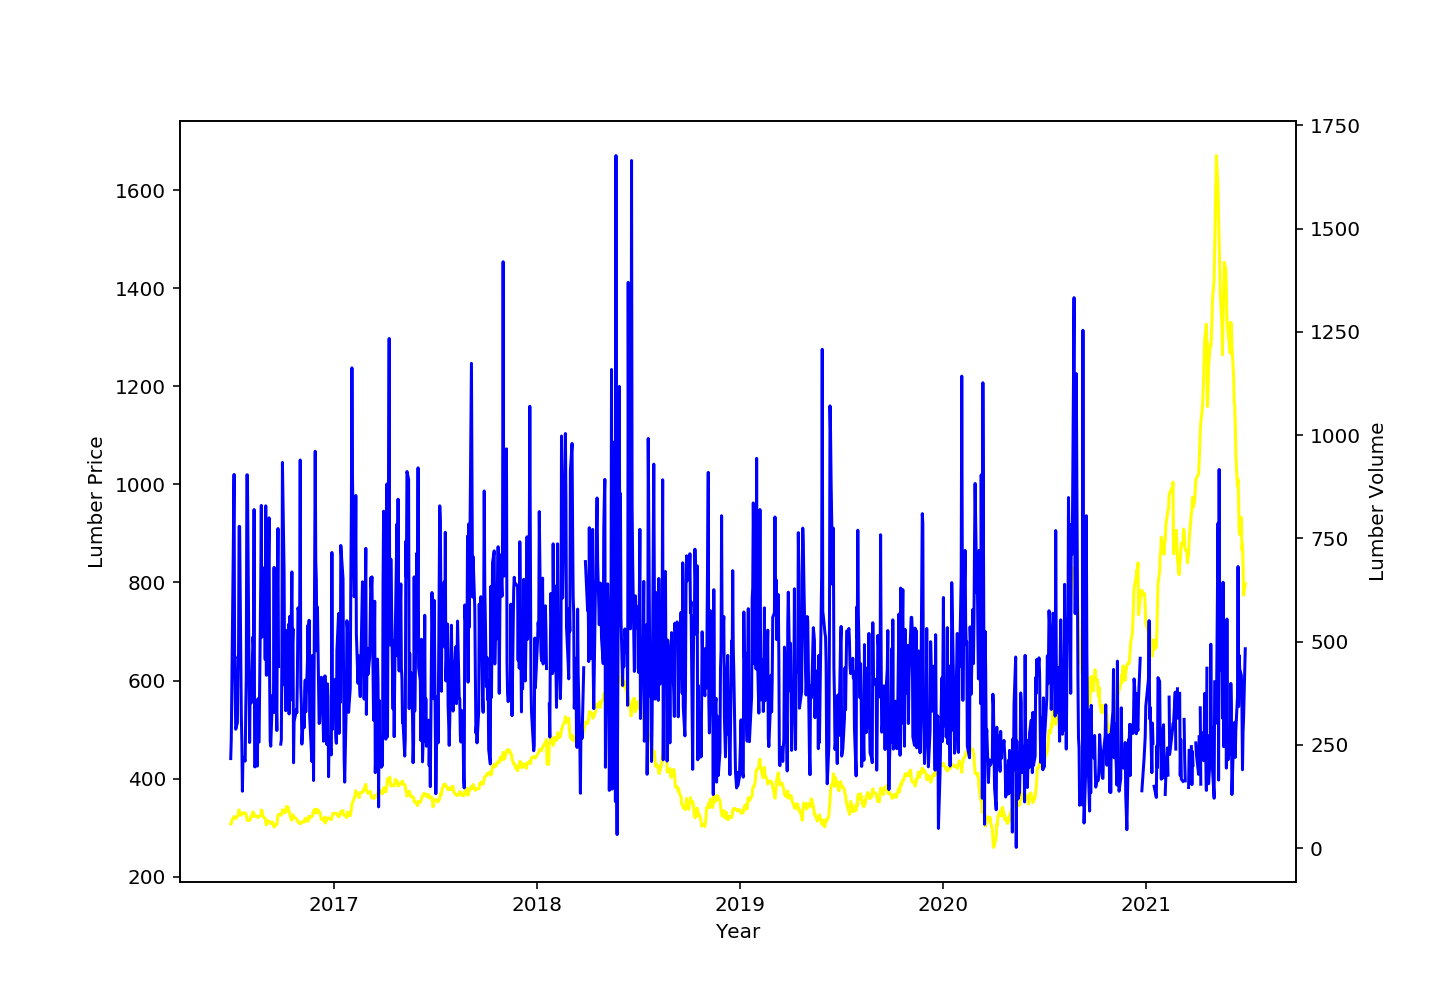

In [31]:
# Plotting the column plots in a row
price_vol_row = pn.Row(price_vol_as_column1, price_vol_as_column2)
price_vol_row

In [32]:
# Daily returns
daily_returns_agri_price = agri_price_df.pct_change()
daily_returns_agri_price.head()


Corn (ZC)  Lumber (LBS)  Soya_bean (ZS)
Date                                               
2016-06-29        NaN           NaN             NaN
2016-06-30  -0.037559      0.000000        0.036629
2016-07-01  -0.016028      0.023724       -0.013657
2016-07-05  -0.025496      0.024762       -0.052967
2016-07-06  -0.023983     -0.003717       -0.003713

In [33]:
# Data types of the fields
daily_returns_agri_price.dtypes


Corn (ZC)         float64
Lumber (LBS)      float64
Soya_bean (ZS)    float64
dtype: object

In [34]:
# 30 day Moving Average (rolling window of 30 day)
moving_avg_agri = daily_returns_agri_price.rolling(window=30).mean()

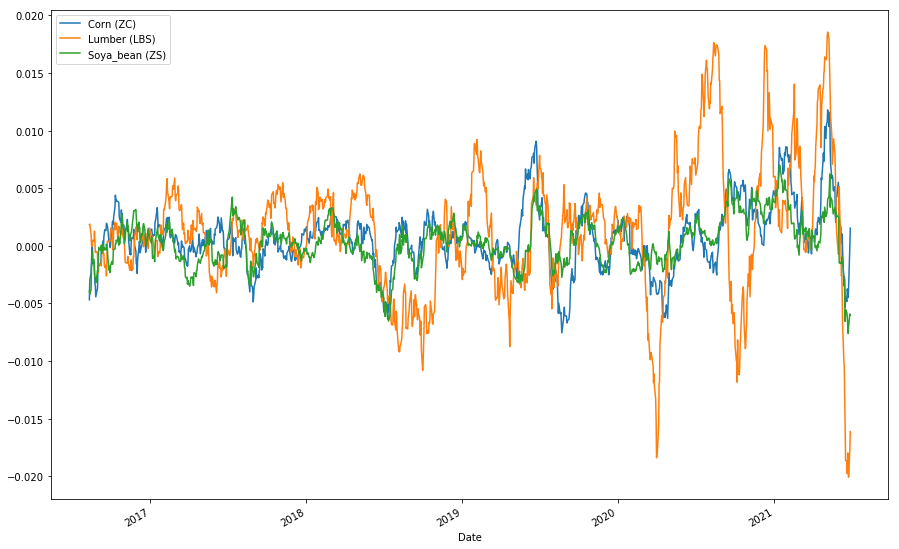

In [35]:
moving_avg_agri.plot(figsize=(15,10))

In [36]:
#agri_price_df.groupby(pd.Grouper(key='Date',freq='M')).mean()
agri_price_by_year = agri_price_df.groupby([agri_price_df.index.year]).first()
agri_price_by_year

Corn (ZC)  Lumber (LBS)  Soya_bean (ZS)
Date                                         
2016     372.75         307.7         1112.50
2017     355.75         329.1          995.00
2018     353.25         449.5          964.75
2019     375.75         333.2          907.00
2020     391.50         431.8          956.25
2021     483.75         700.6         1313.00

In [37]:
plot = agri_price_by_year.hvplot.bar(rot=90, width=700, height = 600).opts(yformatter="%.0f")
plot

:Bars   [Date,Variable]   (value)

In [38]:
#######################################################################

### Top 6 Corn producing countries info was taken from the following URL :

https://www.investopedia.com/articles/markets-economy/090316/6-countries-produce-most-corn.asp

1. United States
2. China
3. Brazil
4. Argentina
5. Ukraine
6. India

### Tope 6 Timber producing countries info was taken from the following URL :
https://www.mapsofworld.com/world-top-ten/countries-with-most-timber-producing-countries.html

1. United States
2. India
3. China
4. Brazil
5. Canada
6. Russia

### Tope 6 Timber producing countries info was taken from the following URL :
https://www.mapsofworld.com/world-top-ten/soybean-producing-countries.html

1. United States
2. Brazil
3. Argentina
4. China
5. India
6. Paraguay 

In [39]:
########################################################################

In [40]:
# Read Vaccination csv data
csvpath_vaccine=("Source Data/share-people-fully-vaccinated-covid.csv")
vaccine_data_df = pd.read_csv(csvpath_vaccine, parse_dates=True, index_col="Day", infer_datetime_format=True)
vaccine_data_df.head(5)

Entity Code  people_fully_vaccinated_per_hundred  \
Day                                                                 
2021-05-11  Afghanistan  AFG                                 0.14   
2021-05-20  Afghanistan  AFG                                 0.20   
2021-05-24  Afghanistan  AFG                                 0.25   
2021-05-26  Afghanistan  AFG                                 0.29   
2021-05-27  Afghanistan  AFG                                 0.29   

           145609-annotations  
Day                            
2021-05-11                NaN  
2021-05-20                NaN  
2021-05-24                NaN  
2021-05-26                NaN  
2021-05-27                NaN

In [41]:
# Dropping column '145609-annotations'
vaccine_data_df = vaccine_data_df.drop(columns=['145609-annotations'])
vaccine_data_df

Entity Code  people_fully_vaccinated_per_hundred
Day                                                              
2021-05-11  Afghanistan  AFG                                 0.14
2021-05-20  Afghanistan  AFG                                 0.20
2021-05-24  Afghanistan  AFG                                 0.25
2021-05-26  Afghanistan  AFG                                 0.29
2021-05-27  Afghanistan  AFG                                 0.29
...                 ...  ...                                  ...
2021-06-26     Zimbabwe  ZWE                                 3.38
2021-06-27     Zimbabwe  ZWE                                 3.49
2021-06-28     Zimbabwe  ZWE                                 3.60
2021-06-29     Zimbabwe  ZWE                                 3.67
2021-06-30     Zimbabwe  ZWE                                 3.74

[14120 rows x 3 columns]

In [42]:
# Assigning column names
columns = ('Country', 'Country Code', 'People Vaccinated per 100')
vaccine_data_df.columns = columns
vaccine_data_df.head()

Country Country Code  People Vaccinated per 100
Day                                                            
2021-05-11  Afghanistan          AFG                       0.14
2021-05-20  Afghanistan          AFG                       0.20
2021-05-24  Afghanistan          AFG                       0.25
2021-05-26  Afghanistan          AFG                       0.29
2021-05-27  Afghanistan          AFG                       0.29

In [43]:
vaccine_data_df.tail()

Country Country Code  People Vaccinated per 100
Day                                                         
2021-06-26  Zimbabwe          ZWE                       3.38
2021-06-27  Zimbabwe          ZWE                       3.49
2021-06-28  Zimbabwe          ZWE                       3.60
2021-06-29  Zimbabwe          ZWE                       3.67
2021-06-30  Zimbabwe          ZWE                       3.74

In [44]:
# Vaccine Data by country
plot = vaccine_data_df.hvplot.bar(groupby='Country', rot=90, width=700, height = 600).opts(yformatter="%.0f")
plot

:DynamicMap   [Country]
   :Bars   [Day]   (People Vaccinated per 100)

In [45]:
# Data grouping by year and month
#vaccine_by_mth = vaccine_data_df.groupby([vaccine_data_df['Country'], vaccine_data_df.index.year, vaccine_data_df.index.month]).mean()
#vaccine_by_mth.head(30)

In [46]:
# Data grouping by year and month
vaccine_by_mth1 = vaccine_data_df.groupby([vaccine_data_df['Country'], vaccine_data_df.index.year, vaccine_data_df.index.month]).mean()
vaccine_by_mth1.index.names = ['Country', 'Year', 'Month']
vaccine_by_mth1.reset_index(inplace=True)
vaccine_by_mth1.head()

Country  Year  Month  People Vaccinated per 100
0  Afghanistan  2021      5                   0.246667
1  Afghanistan  2021      6                   0.435714
2       Africa  2021      2                   0.003750
3       Africa  2021      3                   0.150968
4       Africa  2021      4                   0.340000

In [47]:
# Replace Month value with string discription
#vaccine_by_country_soya = []
vaccine_by_mth = vaccine_by_mth1.replace({'Month': {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun"}})
vaccine_by_mth.head()

Country  Year Month  People Vaccinated per 100
0  Afghanistan  2021   May                   0.246667
1  Afghanistan  2021   Jun                   0.435714
2       Africa  2021   Feb                   0.003750
3       Africa  2021   Mar                   0.150968
4       Africa  2021   Apr                   0.340000

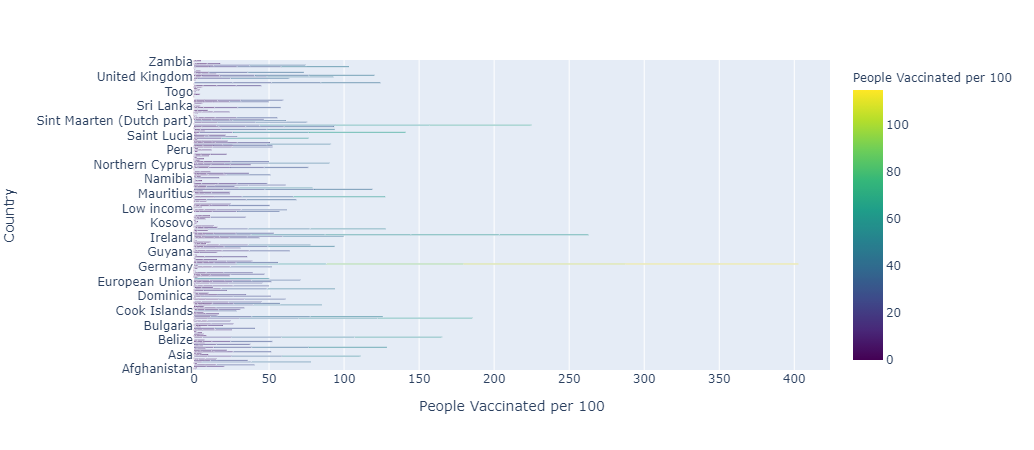

In [48]:
# Plotting the world vaccine data by country
plot = px.bar(
    vaccine_by_mth, 
    x = 'People Vaccinated per 100', 
    y = 'Country', 
    color = 'People Vaccinated per 100', 
    color_continuous_scale = px.colors.sequential.Viridis,
)
plot.show()

In [49]:
print(vaccine_by_mth['Country'].unique())

['Afghanistan' 'Africa' 'Albania' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Cambodia'
 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Europe'
 'European Union' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland'
 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guatemala' 'Guernsey'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'High income

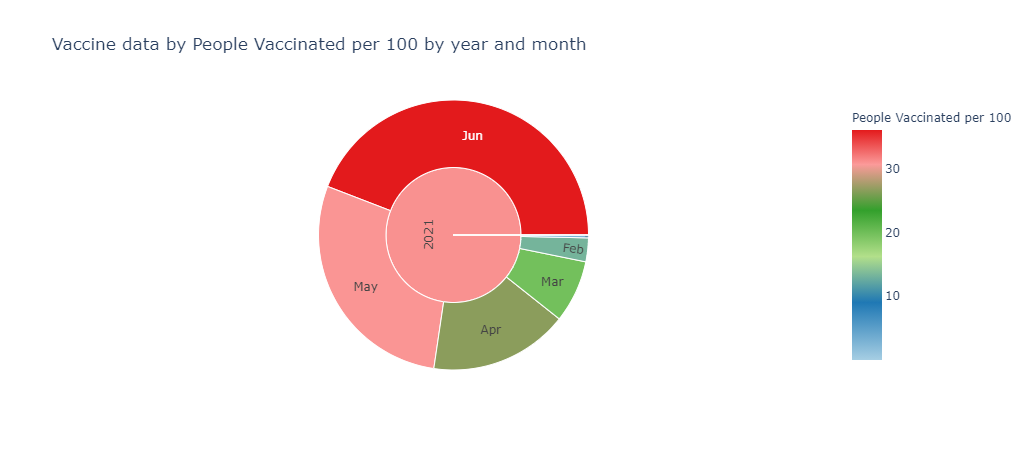

In [50]:
### Vaccine data by 2021 month 
vaccine_world = px.sunburst(vaccine_by_mth, 
                  path=['Year','Month'], 
                  values='People Vaccinated per 100',
                  color='People Vaccinated per 100', 
                  title = "Vaccine data by People Vaccinated per 100 by year and month",
                  color_continuous_scale=[[0, "rgb(166,206,227)"],
                [0.25, "rgb(31,120,180)"],
                [0.45, "rgb(178,223,138)"],
                [0.65, "rgb(51,160,44)"],
                [0.85, "rgb(251,154,153)"],
                [1, "rgb(227,26,28)"]]
                 )
vaccine_world.show()

In [51]:
# Data slicing for Tope 6 countries producing Corn
vaccine_by_country_corn_df=[]
vaccine_by_country_corn_df = vaccine_by_mth[(vaccine_by_mth["Country"].str.contains("United States"))
                 | (vaccine_by_mth["Country"].str.contains("China"))
                 | (vaccine_by_mth["Country"].str.contains("Brazil"))
                 | (vaccine_by_mth["Country"].str.contains("Argentina"))
                 | (vaccine_by_mth["Country"].str.contains("Ukraine"))
                 | (vaccine_by_mth["Country"].str.contains("India"))
             ]
vaccine_by_country_corn_df.head()

Country  Year Month  People Vaccinated per 100
21  Argentina  2021   Jan                   0.086364
22  Argentina  2021   Feb                   0.498462
23  Argentina  2021   Mar                   1.084667
24  Argentina  2021   Apr                   1.726667
25  Argentina  2021   May                   4.114516

In [52]:
# Data slicing for Tope 6 countries producing Lumber
vaccine_by_country_lumber_df=[]
vaccine_by_country_lumber_df = vaccine_by_mth[(vaccine_by_mth["Country"].str.contains("United States"))
                 | (vaccine_by_mth["Country"].str.contains("China"))
                 | (vaccine_by_mth["Country"].str.contains("Brazil"))
                 | (vaccine_by_mth["Country"].str.contains("Canada"))
                 | (vaccine_by_mth["Country"].str.contains("Russia"))
                 | (vaccine_by_mth["Country"].str.contains("India"))
             ]
vaccine_by_country_lumber_df.head()


Country  Year Month  People Vaccinated per 100
89  Brazil  2021   Feb                   0.339565
90  Brazil  2021   Mar                   1.512308
91  Brazil  2021   Apr                   3.893462
92  Brazil  2021   May                   8.225200
93  Brazil  2021   Jun                  11.288333

In [53]:
# Data slicing for Tope 6 countries producing Soya_bean
vaccine_by_country_soya_df=[]
vaccine_by_country_soya_df = vaccine_by_mth[(vaccine_by_mth["Country"].str.contains("United States"))
                 | (vaccine_by_mth["Country"].str.contains("China"))
                 | (vaccine_by_mth["Country"].str.contains("Brazil"))
                 | (vaccine_by_mth["Country"].str.contains("Argentina"))
                 | (vaccine_by_mth["Country"].str.contains("Paraguay"))
                 | (vaccine_by_mth["Country"].str.contains("India"))
             ]
vaccine_by_country_soya_df.head()

Country  Year Month  People Vaccinated per 100
21  Argentina  2021   Jan                   0.086364
22  Argentina  2021   Feb                   0.498462
23  Argentina  2021   Mar                   1.084667
24  Argentina  2021   Apr                   1.726667
25  Argentina  2021   May                   4.114516

In [54]:
# Data checking for the uniquness on country (corn)
print(vaccine_by_country_corn_df['Country'].unique())

['Argentina' 'Brazil' 'China' 'India' 'Ukraine' 'United States']


In [55]:
# Data checking for the uniquness on country (lumber)
print(vaccine_by_country_lumber_df['Country'].unique())

['Brazil' 'Canada' 'China' 'India' 'Russia' 'United States']


In [56]:
# Data checking for the uniquness on country (lumber)
print(vaccine_by_country_soya_df['Country'].unique())

['Argentina' 'Brazil' 'China' 'India' 'Paraguay' 'United States']


In [57]:
# Replace Month value with string discription
vaccine_by_country_corn = []
vaccine_by_country_corn = vaccine_by_country_corn_df.replace({'Month': {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun"}})
vaccine_by_country_corn.head()

Country  Year Month  People Vaccinated per 100
21  Argentina  2021   Jan                   0.086364
22  Argentina  2021   Feb                   0.498462
23  Argentina  2021   Mar                   1.084667
24  Argentina  2021   Apr                   1.726667
25  Argentina  2021   May                   4.114516

In [58]:
vaccine_by_country_corn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 21 to 760
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    27 non-null     object 
 1   Year                       27 non-null     int64  
 2   Month                      27 non-null     object 
 3   People Vaccinated per 100  27 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [59]:
# Replace Month value with string discription
vaccine_by_country_lumber = []
vaccine_by_country_lumber = vaccine_by_country_lumber_df.replace({'Month': {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun"}})
vaccine_by_country_lumber.head()

Country  Year Month  People Vaccinated per 100
89  Brazil  2021   Feb                   0.339565
90  Brazil  2021   Mar                   1.512308
91  Brazil  2021   Apr                   3.893462
92  Brazil  2021   May                   8.225200
93  Brazil  2021   Jun                  11.288333

In [60]:
vaccine_by_country_lumber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 89 to 760
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    27 non-null     object 
 1   Year                       27 non-null     int64  
 2   Month                      27 non-null     object 
 3   People Vaccinated per 100  27 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [61]:
# Replace Month value with string discription
vaccine_by_country_soya = []
vaccine_by_country_soya = vaccine_by_country_soya_df.replace({'Month': {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun"}})
vaccine_by_country_soya.head()

Country  Year Month  People Vaccinated per 100
21  Argentina  2021   Jan                   0.086364
22  Argentina  2021   Feb                   0.498462
23  Argentina  2021   Mar                   1.084667
24  Argentina  2021   Apr                   1.726667
25  Argentina  2021   May                   4.114516

In [62]:
vaccine_by_country_lumber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 89 to 760
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    27 non-null     object 
 1   Year                       27 non-null     int64  
 2   Month                      27 non-null     object 
 3   People Vaccinated per 100  27 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [63]:
# Plotting vaccine data for tope 6 countries producing Corn
vaccine_corn = px.sunburst(vaccine_by_country_corn, 
                  path=['Year','Month'], 
                  values='People Vaccinated per 100',
                  color='People Vaccinated per 100', 
                  title = "Vaccine data for Top 6 Corn producing Countries",
                  color_continuous_scale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]]
                )
#caccine_corn.show()

In [64]:
# Plotting vaccine data for tope 6 countries producing Lumber
vaccine_lumber = px.sunburst(vaccine_by_country_lumber, 
                  path=['Year','Month'], 
                  values='People Vaccinated per 100',
                  color='People Vaccinated per 100', 
                  title = "Vaccine data for Top 6 Lumber producing Countries",
                  color_continuous_scale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]]
                )
#vaccine_lumber.show()

In [65]:
# Plotting vaccine data for tope 6 countries producing Lumber
vaccine_soya = px.sunburst(vaccine_by_country_soya, 
                  path=['Year','Month'], 
                  values='People Vaccinated per 100',
                  color='People Vaccinated per 100', 
                  title = "Vaccine data for Top 6 Soya Bean producing Countries",
                  color_continuous_scale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]]
                )
#vaccine_soya.show()

In [66]:
vaccine_as_column1 = pn.Column(
    '# Vaccine Data  ',
    '## Data on top 6 countries producing Corn, lumber and soyabean',
    vaccine_corn, vaccine_lumber
    )
vaccine_as_column1

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Plotly(Figure)
    [3] Plotly(Figure)

In [67]:
vaccine_as_column2 = pn.Column(
    '# Vaccine Data  ',
    '## Data on top 6 countries producing Corn, lumber and soyabean',
    vaccine_soya, vaccine_world
    )
vaccine_as_column2

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Plotly(Figure)
    [3] Plotly(Figure)

In [68]:
vaccine_row = pn.Row(vaccine_as_column1, vaccine_as_column2)
vaccine_row

Row
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Plotly(Figure)
        [3] Plotly(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Plotly(Figure)
        [3] Plotly(Figure)

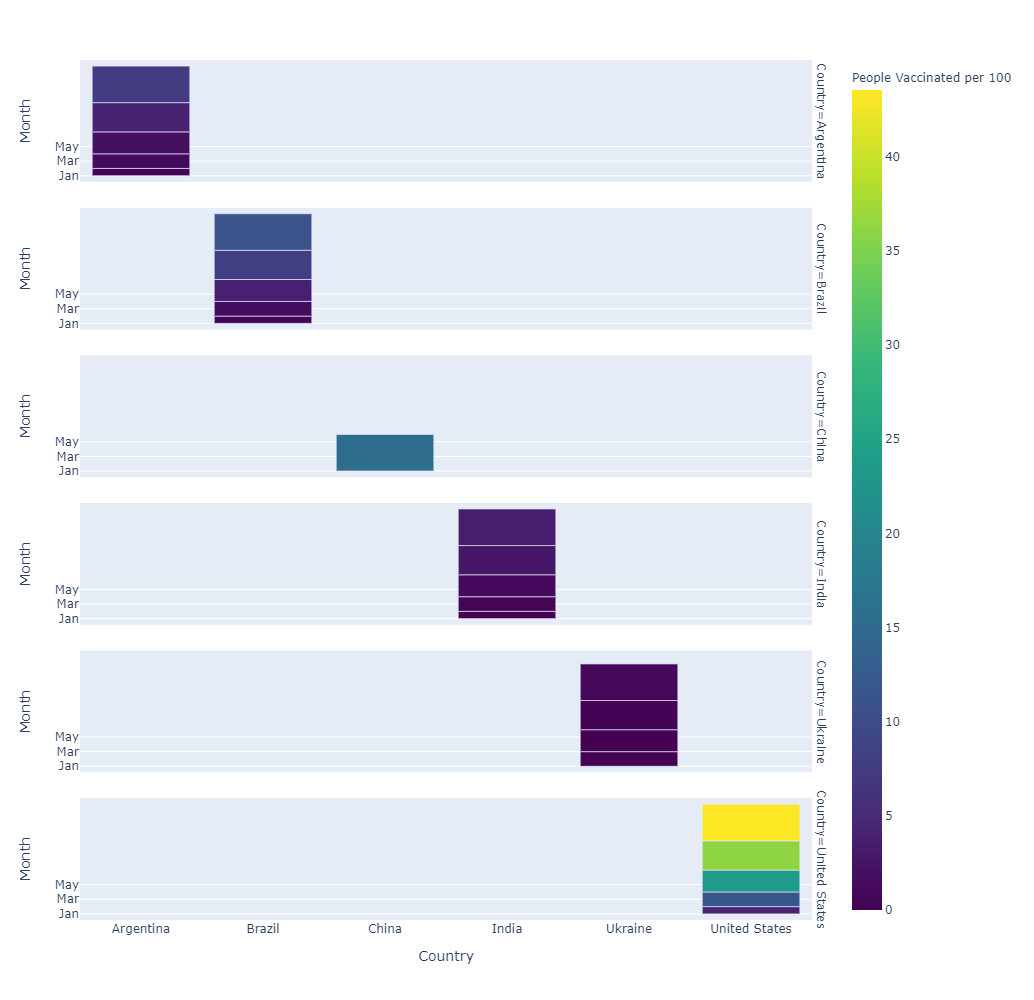

In [69]:
# Plotting vaccine data for the top 6 corn producing countries

plot = px.bar(
    vaccine_by_country_corn, 
    x = "Country", 
    y = "Month", 
    color = "People Vaccinated per 100", 
    facet_row = "Country",
    color_continuous_scale = px.colors.sequential.Viridis,
    height = 1000,
    width = 900
)
plot.show()

In [70]:
# Market Insider
# https://markets.businessinsider.com/commodities/news/lumber-prices-today-futures-plunge-rally-commodity-homebuilding-demand-inflation-2021-6-1030568745

# While it is difficult to point to one specific reason why the price of lumber futures has pulled back, 
# some experts attribute it to the economic reopening, which has caused more people to spend less time at home.
# To begin with, the price skyrocketed at the start of the pandemic when restrictions forced Americans to shelter at home, 
# prompting many to either build new houses or renovate existing ones.
# sawmill operators, truck drivers, and other players in the industry

# adverse effects on supply are the recent wildfires in British Columbia, where the US gets part of its lumber supply, 
# as well as the upcoming hurricanes in Texas and Virginia.

# Earlier in 2021, lumber prices surged, triggered by a confluence of factors - a pandemic, 
# concerns of an overheating housing market, and millennials reaching home-buying age. 
# On top of this, there was already a shortage of lumber supply before the pandemic even began.

In [71]:
# AGWEB market analysis for Corn and Soya bean
# https://www.agweb.com/markets/market-analysis/market-surprise-lower-expected-planted-acres-send-prices-higher

# Market Surprise: Lower-Than-Expected Planted Acres Send Prices Higher

# Corn stocks in all positions on June 1, 2021 totaled 4.11 billion bushels, down 18% from June 1, 2020. 
# Of the total stocks, 1.74 billion bushels are stored on farms, down 39% from a year earlier. 
# Off-farm stocks, at 2.37 billion bushels, are up 11% from a year ago. 
# The March - May 2021 indicated disappearance is 3.58 billion bushels, 
# compared with 2.95 billion bushels during the same period last year.

# Soybeans stored in all positions on June 1, 2021 totaled 767 million bushels, down 44% from June 1, 2020. 
# On-farm stocks totaled 220 million bushels, down 65% from a year ago. Off-farm stocks, at 547 million bushels, are down 27% from a year ago. 
# Indicated disappearance for the March - May 2021 quarter totaled 795 million bushels, down 9% from the same period a year earlier.